### Trabalho 1

Questão 1

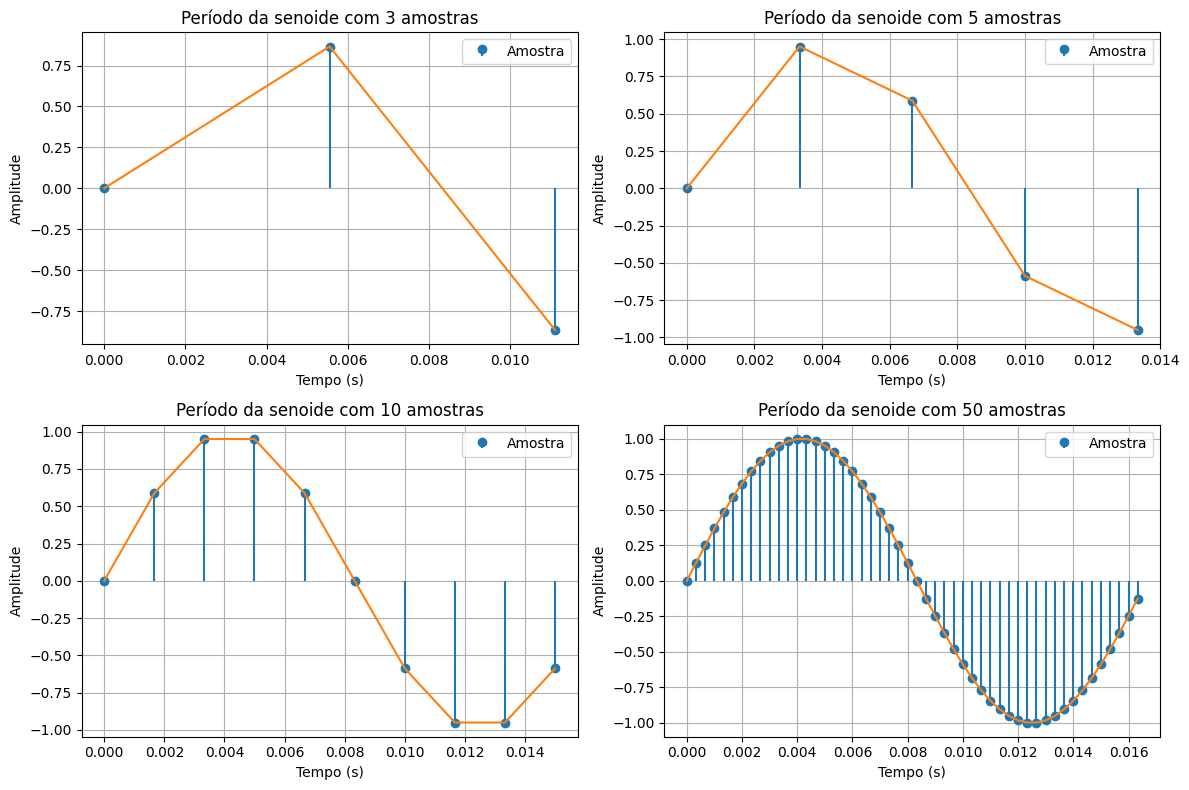

In [4]:
import matplotlib.pyplot as plt
import numpy as np

p = [3,5,10,50]
freq = 60 #in Hz
T = 1/freq

plt.figure(figsize=(12, 8))

for i, amostras in enumerate(p, 1):
    generate_amostras = np.linspace(0, T, amostras, endpoint=False)
    sen = np.sin(2 * np.pi * freq * generate_amostras)
    
    plt.subplot(2, 2, i)
    plt.stem(generate_amostras, sen, basefmt=" ", label=f'Amostra')
    plt.plot(generate_amostras, sen)
    plt.title(f'Período da senoide com {amostras} amostras')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

Questão 2

$$x[n] = C\alpha^n$$
$$\alpha=\exp^\beta$$
$$x[n] = C\exp^{\beta n}$$
a) Para um sinal exponencial, temos:
$$\alpha,C \in \mathbb{R}$$

b) Para um sinal complexo oscilatório, temos:
$$a,b \in \mathbb{C}$$
$$\alpha = \exp^\beta, \beta = j\omega{_0}$$
$$x[n] = C\exp^{j\omega{_0} n}$$
Pela identidade de Euler, temos:
$$\exp^{j\omega{_0} n} = \cos(\omega{_0} n) + \sin(\omega{_0} n)$$
$$x[n]= A\cos(\omega{_0} n + \phi)$$

c) Para um sinal complexo oscilatório amortecido, temos:
$$a,b \in \mathbb{C}$$
$$C=|C|\exp^{j\phi}, |\alpha| \neq 1, com\ \alpha=|\alpha|\exp^{j\omega{_0}}$$

In [137]:
'''
Na situação em que o sinal é apenas exponencial, isso significa que minhas constantes a e C
'''

def signal_exp(a, c, taxa_amostragem=100, f=10, fs=50):

    n = np.linspace(0, 5, taxa_amostragem)

    # Angular frequency, f and fs in Hz
    omega = 2 * np.pi * f / fs

    if type(a) == complex and type(c) == complex:
        if a.real != 0:
            exp = c*np.exp((a.real + 1j * a.imag) * omega * n)
            # Sinal exponencial complexo amortecido
            title = 'Parte Real do Sinal Exponencial Complexo Amortecido'
            title_im = 'Parte Imaginária do Sinal Exponencial Complexo Amortecido'
            magnitude = 'Magnitude do Sinal Exponencial Complexo Amortecido'
        else:
            exp = c*np.exp(a * omega * n)
            # Sinal exponencial complexo
            title = 'Parte Real do Sinal Exponencial Complexo'
            title_im = 'Parte Imaginária do Sinal Exponencial Complexo'
            magnitude = 'Magnitude do Sinal Exponencial Complexo'

        fig, ax = plt.subplots(3, 1, figsize=(12, 8))

        # Parte Real
        ax[0].stem(n, np.real(exp), basefmt=" ")
        ax[0].plot(n, np.real(exp))
        ax[0].set_title(title)
        ax[0].set_ylabel("Re{x[n]}")
        ax[0].grid()

        # Parte Imaginária
        ax[1].stem(n, np.imag(exp), basefmt=" ")
        ax[1].plot(n, np.imag(exp))
        ax[1].set_title(title_im)
        ax[1].set_ylabel("Im{x[n]}")
        ax[1].grid()

        # Magnitude
        ax[2].stem(n, np.abs(exp), basefmt=" ")
        ax[2].plot(n, np.abs(exp))
        ax[2].set_title(magnitude)
        ax[2].set_ylabel("|x[n]|")
        ax[2].set_xlabel("Amostras (n)")
        ax[2].grid()

        plt.tight_layout()
        plt.show()

    elif type(a) == float or type(a) == int:
        exp = c*np.exp(a * omega * n)
        plt.stem(n, exp, basefmt=" ", label=f'{len(n)} Amostras')
        plt.plot(n, exp)
        plt.title(f'Período da senoide com {len(n)} amostras')
        plt.xlabel('Tempo (s)')
        plt.ylabel('Amplitude')
        plt.grid(True)
        plt.legend()

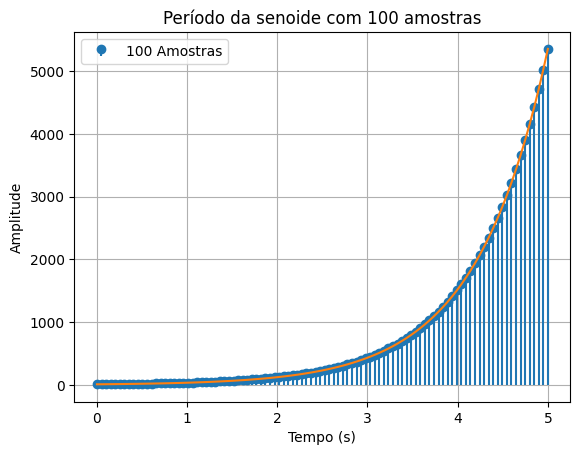

In [200]:
# Item a)
c = 10 # Amplitude do sinal
a = 1
'''
Motivo da escolha:
Pela própria definição de sinal exponencial (quando não especificado, eu assumo que seja real), 
a única maneira de escolher constantes a e c que satisfaçam isso, é que a e c pertencam aos números reais.
Portanto, escolhendo a = 1 e c = 10, conseguimos reproduzir um sinal exponencial.
'''

# Item b)
#c = 1 + 2j # Complex
#a = 3j # Complex
'''
Motivo da escolha:
Assim como no item a) a própria definição de sinal exponencial é quando temos que a e c pertecem ao conjunto 
complexo. Portanto, escolhendo-se quaisquer a e c, desde que sejam complexos conseguimos reproduzir um sinal 
exponencial complexo.
'''

# Item c) 
#c = 1 + 2j # Complex
#a = -1 + 3j # Complex
'''
Motivo da escolha:
Por fim, seguindo a mesma linha de raciocínio que o item b), um sinal exponencial complexo amortecido é um sinal
cuja frequência busca se "estabilizar" a partir de um determinado tempo. Ou seja, além da parte imaginária,
a função exponencial tem um fator de amortecimento que pra esse caso, eu supus que fosse a = -1 + 3j, além do 
óbvio, a parte complexa da constante c, que por definição de sinal exponencial complexo, a e c devem ser complexos.
'''

signal_exp(a, c)

Questão 3

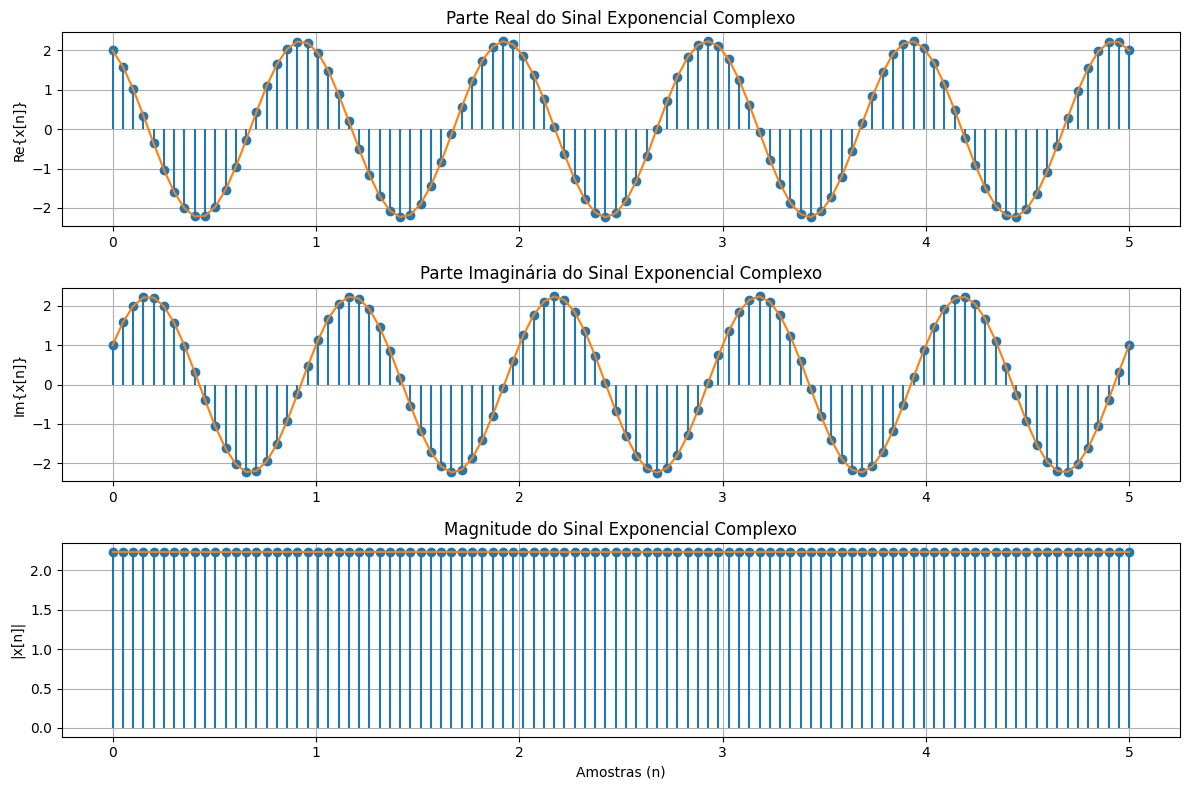

'\nR: \nSe analisarmos o uso de diferentes f e fs, fatores estes que alteram diretamente o valor da frequência omega,\nnotaremos que combinar tais fatores para gerar um grande omega não necessariamente geram maiores oscilação do\nsinal. O motivo pra isso é que a oscilação de um sinal exponencial complexo depende da frequência omega que, por\nsua vez varia do intervalo de 0 a 2pi, para valore maiores que isso, o que teriamos era o mesmo comportamento do\nsinal equivalente a seus múltiplos, ou seja: 0 = 2pi = 4pi = 6pi... Com essa analise, podemos responder também \nqual valor de frequência omega o sinal oscila mais rápido, já que sabemos que temos maior oscilação do sinal quando \nomega é pi. \n'

In [150]:
# Podemos usar a mesma função que criei e usar especificamente o caso do sinal exponencial complexo

a = 1j
c = 2+1j

signal_exp(a, c, f=1, fs=1)

'''
R: 
Se analisarmos o uso de diferentes f e fs, fatores estes que alteram diretamente o valor da frequência omega,
notaremos que combinar tais fatores para gerar um grande omega não necessariamente geram maiores oscilação do
sinal. O motivo pra isso é que a oscilação de um sinal exponencial complexo depende da frequência omega que, por
sua vez varia do intervalo de 0 a 2pi, para valore maiores que isso, o que teriamos era o mesmo comportamento do
sinal equivalente a seus múltiplos, ou seja: 0 = 2pi = 4pi = 6pi... Com essa analise, podemos responder também 
qual valor de frequência omega o sinal oscila mais rápido, já que sabemos que temos maior oscilação do sinal quando 
omega é pi. 
'''

Questão 4

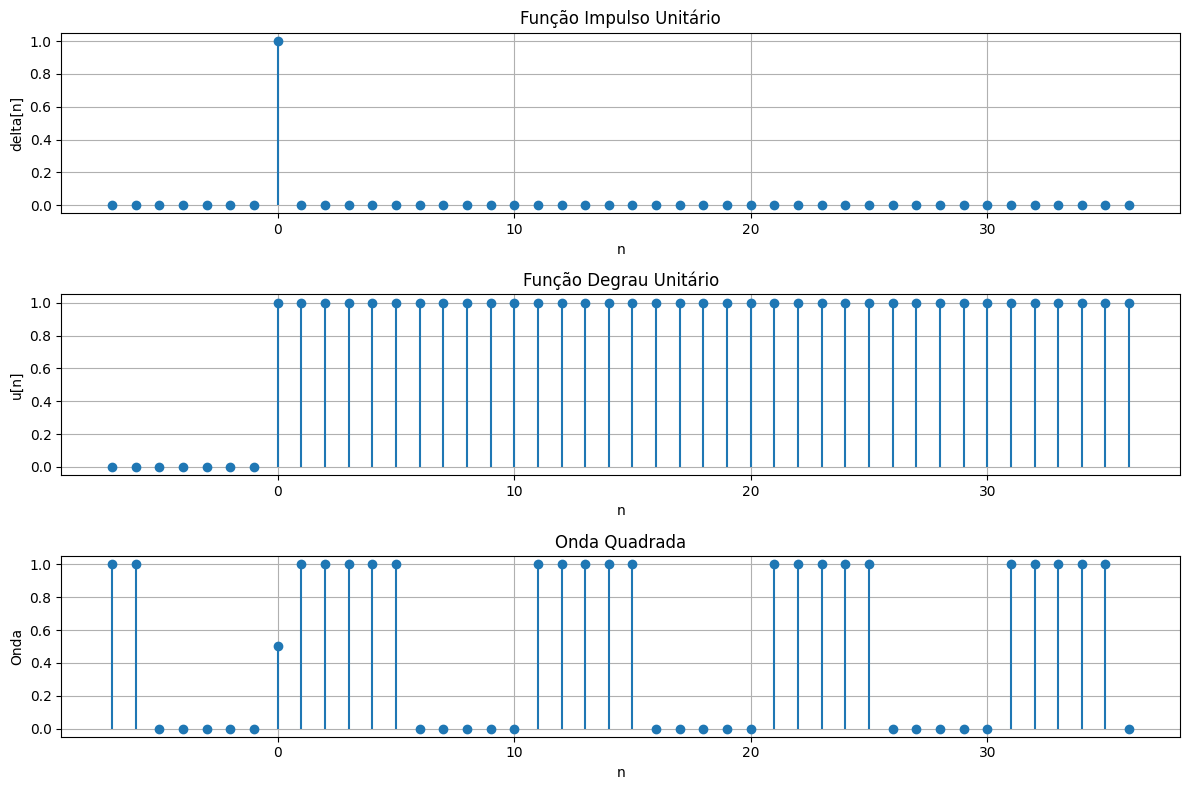

In [179]:
from scipy import signal

# Criando amostras de -7 até 37 (valor arbitrário)
t = np.arange(-7, 37)
impulse = np.zeros_like(t)
impulse[t == 0] = 1

# Implementação das técnicas first_difference e cumulative_sum usando numpy
step_from_impulse = np.cumsum(impulse) 
impulse_from_step = np.diff(step_from_impulse) 
square_wave = (np.sign(np.sin(2 * np.pi * t / 10)) + 1) / 2

plt.figure(figsize=(12,8))

# Função impulso
plt.subplot(3, 1, 1)
plt.stem(t, impulse, basefmt=" ")
plt.title("Função Impulso Unitário")
plt.xlabel("n")
plt.ylabel("delta[n]")
plt.grid()

# Função degrau a partir do impulso
plt.subplot(3, 1, 2)
plt.stem(t, step_from_impulse, basefmt=" ")
plt.title("Função Degrau Unitário")
plt.xlabel("n")
plt.ylabel("u[n]")
plt.grid()

# Onda quadrada
plt.subplot(3, 1, 3)
plt.stem(t, square_wave, basefmt=" ")
plt.title("Onda Quadrada")
plt.xlabel("n")
plt.ylabel("Onda")
plt.grid()

plt.tight_layout()
plt.show()

Questão 5

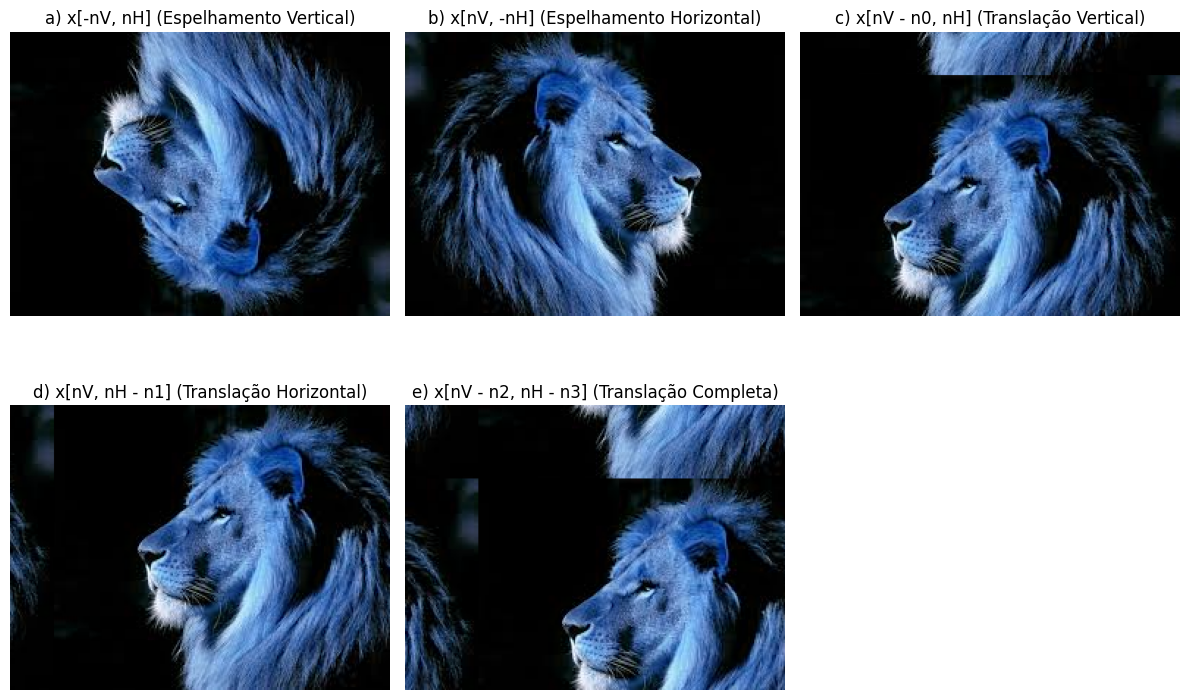

In [189]:
import cv2 as cv

img = cv.imread('D:\\Area de trabalho\\Faculdade\\Disciplinas\\Systems and Signals\\trab1\\material_trabalho01\\image.jpg')
image = cv.cvtColor(img, 0)

# Item a) Invertendo a imagem na vertical
a_image = np.flipud(image)

# Item b) Invertendo a imagem na horizontal
b_image = np.fliplr(image)

n = 30

# Item c) (Translação vertical)
c_image = np.roll(image, shift=n, axis=0)

# Item d) x[nV, nH - n1] (Translação horizontal)
d_image = np.roll(image, shift=n, axis=1)

# Item e) x[nV - n2, nH - n3] (Translação em ambas as direções)
n1, n2 = 50, 50  # Exemplos de deslocamentos
e_image = np.roll(np.roll(image, shift=n1, axis=0), shift=n2, axis=1)

# Plots
plt.figure(figsize=(12, 8))

titles = [
    "a) x[-nV, nH] (Espelhamento Vertical)",
    "b) x[nV, -nH] (Espelhamento Horizontal)",
    "c) x[nV - n0, nH] (Translação Vertical)",
    "d) x[nV, nH - n1] (Translação Horizontal)",
    "e) x[nV - n2, nH - n3] (Translação Completa)"
]

images = [a_image, b_image, c_image, d_image, e_image]

for i, img in enumerate(images, 1):
    plt.subplot(2, 3, i)
    plt.imshow(img, cmap='gray')
    plt.title(titles[i - 1])
    plt.axis('off')

plt.tight_layout()
plt.show()

Questão 6

In [190]:
import pandas as pd

dados = pd.read_csv('D:\\Area de trabalho\\Faculdade\\Disciplinas\\Systems and Signals\\trab1\\material_trabalho01\\samples.csv')
dados

,t_n,x_n
0,0.00000,1.462562
1,0.01001,1.040984
2,0.02002,1.863227
3,0.03003,1.490946
4,0.04004,0.562506
...,...,...
995,9.95996,-1.149366
996,9.96997,-1.169620
997,9.97998,-0.114381
998,9.98999,-0.121550


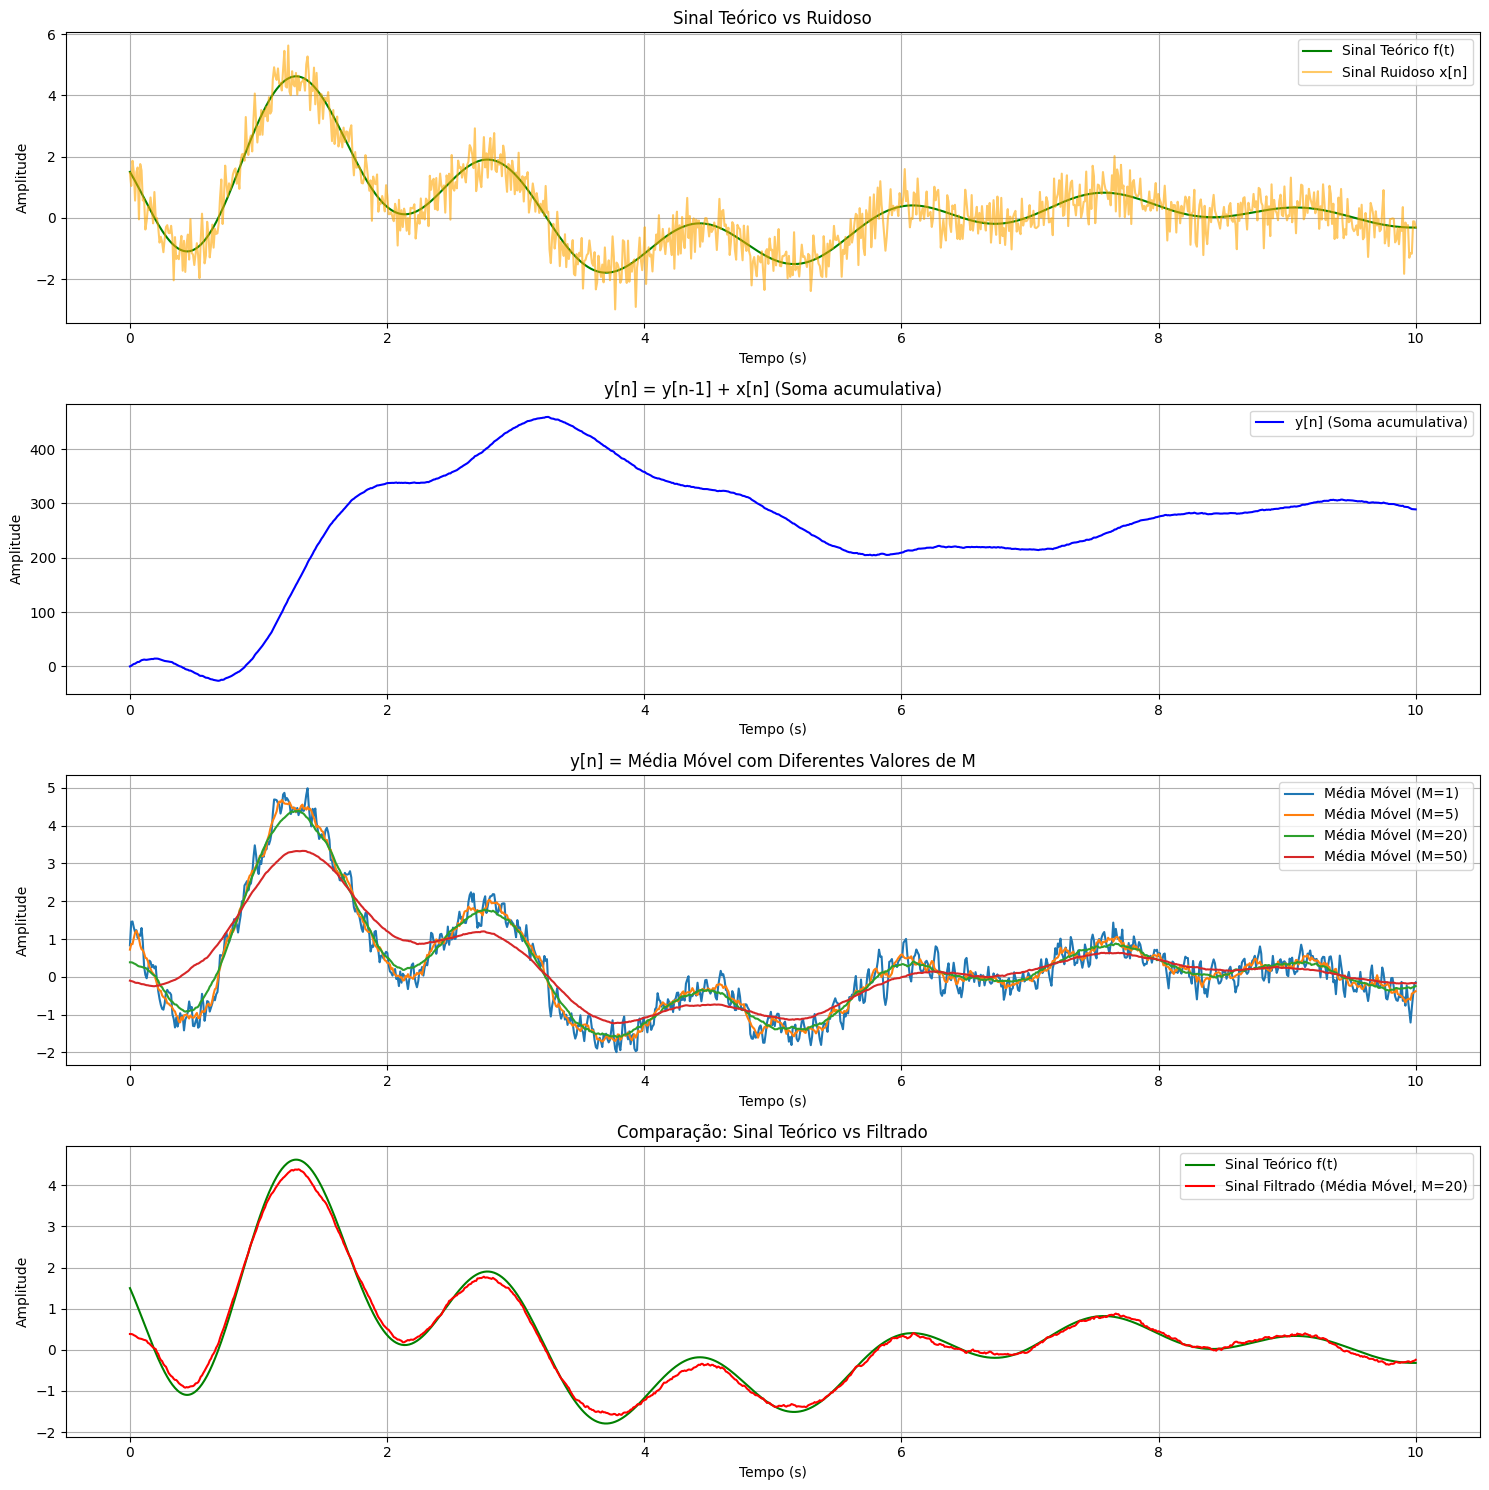

In [ ]:
# Parâmetros
t = dados['t_n'] # amostras
x = dados['x_n'] # Sinal ruidoso

# Sinal ideal
f_t = 0.75 * np.exp(-0.275 * t) * (4 * np.cos(4 * t + np.pi / 3) + 5 * np.sin(t))

# (a) 
y_a = np.zeros_like(x)
for n in range(1, len(x)):
    y_a[n] = y_a[n - 1] + x[n]

# (b) 
def moving_average(signal, M):
    kernel_size = 2 * M + 1
    return np.convolve(signal, np.ones(kernel_size) / kernel_size, mode='same')

M_values = [1, 5, 20, 50]  # Testando diferentes valores de M
y_b_results = {M: moving_average(x, M) for M in M_values}

# Plots
plt.figure(figsize=(15, 15))

# Sinal teórico vs Sinal ruidoso
plt.subplot(4, 1, 1)
plt.plot(t, f_t, label="Sinal Teórico f(t)", color="green")
plt.plot(t, x, label="Sinal Ruidoso x[n]", color="orange", alpha=0.6)
plt.title("Sinal Teórico vs Ruidoso")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()

# (a) Soma acumulativa
plt.subplot(4, 1, 2)
plt.plot(t, y_a, label="y[n] (Soma acumulativa)", color="blue")
plt.title("y[n] = y[n-1] + x[n] (Soma acumulativa)")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()

# (b) Média móvel para diferentes valores de M
plt.subplot(4, 1, 3)
for M, y_b in y_b_results.items():
    plt.plot(t, y_b, label=f"Média Móvel (M={M})")
plt.title("y[n] = Média Móvel com Diferentes Valores de M")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()

# Melhor valor de M: Comparação com o sinal teórico
plt.subplot(4, 1, 4)
best_M = 20 
y_b_best = y_b_results[best_M]
plt.plot(t, f_t, label="Sinal Teórico f(t)", color="green")
plt.plot(t, y_b_best, label=f"Sinal Filtrado (Média Móvel, M={best_M})", color="red")
plt.title("Comparação: Sinal Teórico vs Filtrado")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()